In [ ]:



import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

#  Data Loading

In [ ]:
import pandas
df = pandas.read_csv("../data/data/benin-malanville.csv")

In [ ]:
print("Data Shape:", df.shape)
print("\nData Types:\n", df.dtypes)
df.head()

Data Shape: (525600, 19)

Data Types:
 Timestamp         object
GHI              float64
DNI              float64
DHI              float64
ModA             float64
ModB             float64
Tamb             float64
RH               float64
WS               float64
WSgust           float64
WSstdev          float64
WD               float64
WDstdev          float64
BP                 int64
Cleaning           int64
Precipitation    float64
TModA            float64
TModB            float64
Comments         float64
dtype: object


Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
0  2021-08-09 00:01 -1.2 -0.2 -1.1   0.0   0.0  26.2  93.4  0.0     0.4   
1  2021-08-09 00:02 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.6  0.0     0.0   
2  2021-08-09 00:03 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.7  0.3     1.1   
3  2021-08-09 00:04 -1.1 -0.1 -1.0   0.0   0.0  26.2  93.3  0.2     0.7   
4  2021-08-09 00:05 -1.0 -0.1 -1.0   0.0   0.0  26.2  93.3  0.1     0.7   

   WSstdev     WD  WDstdev   BP  Cleaning  Precipitation  TModA  TModB  \
0      0.1  122.1      0.0  998         0            0.0   26.3   26.2   
1      0.0    0.0      0.0  998         0            0.0   26.3   26.2   
2      0.5  124.6      1.5  997         0            0.0   26.4   26.2   
3      0.4  120.3      1.3  997         0            0.0   26.4   26.3   
4      0.3  113.2      1.0  997         0            0.0   26.4   26.3   

   Comments  
0       NaN  
1       NaN  
2       NaN  
3       NaN  
4       NaN

In [ ]:

print("Summary Statistics:")
display(df.describe(include=[np.number]))


missing_values = df.isna().sum()
missing_percent = (missing_values / len(df)) * 100

missing_report = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage (%)': missing_percent
})

print("\nMissing Value Report:")
display(missing_report[missing_report['Missing Values'] > 0])


high_missing = missing_report[missing_report['Percentage (%)'] > 5]
print("\nColumns with >5% missing values:")
display(high_missing)

Summary Statistics:


GHI            DNI            DHI           ModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      240.559452     167.187516     115.358961     236.589496   
std       331.131327     261.710501     158.691074     326.894859   
min       -12.900000      -7.800000     -12.600000       0.000000   
25%        -2.000000      -0.500000      -2.100000       0.000000   
50%         1.800000      -0.100000       1.600000       4.500000   
75%       483.400000     314.200000     216.300000     463.700000   
max      1413.000000     952.300000     759.200000    1342.300000   

                ModB           Tamb             RH             WS  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      228.883576      28.179683      54.487969       2.121113   
std       316.536515       5.924297      28.073069       1.603466   
min         0.000000      11.000000       2.100000       0.000000   
25%         0.000000      24.200000      28.800000       1.000000   
50%         4.300000      28.000000      55.100000       1.900000   
75%       447.900000      32.300000      80.100000       3.100000   
max      1342.300000      43.800000     100.000000      19.500000   

              WSgust        WSstdev             WD        WDstdev  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean        2.809195       0.473390     153.435172       8.582407   
std         2.029120       0.273395     102.332842       6.385864   
min         0.000000       0.000000       0.000000       0.000000   
25%         1.300000       0.400000      59.000000       3.700000   
50%         2.600000       0.500000     181.000000       8.600000   
75%         4.100000       0.600000     235.100000      12.300000   
max        26.600000       4.200000     360.000000      99.400000   

                  BP       Cleaning  Precipitation          TModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      994.197199       0.000923       0.001905      35.246026   
std         2.474993       0.030363       0.037115      14.807258   
min       985.000000       0.000000       0.000000       9.000000   
25%       993.000000       0.000000       0.000000      24.200000   
50%       994.000000       0.000000       0.000000      30.000000   
75%       996.000000       0.000000       0.000000      46.900000   
max      1003.000000       1.000000       2.500000      81.000000   

               TModB  Comments  
count  525600.000000       0.0  
mean       32.471736       NaN  
std        12.348743       NaN  
min         8.100000       NaN  
25%        23.600000       NaN  
50%        28.900000       NaN  
75%        41.500000       NaN  
max        72.500000       NaN


Missing Value Report:


Missing Values  Percentage (%)
Comments          525600           100.0


Columns with >5% missing values:


Missing Values  Percentage (%)
Comments          525600           100.0

## Summary Statistics & Missing-Value Report

In [ ]:

import os

key_columns = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']


for col in key_columns:
    if col in df.columns:
        df[f'{col}_zscore'] = np.abs(stats.zscore(df[col], nan_policy='omit'))
        

df['Cleaning_flag'] = 0
for col in key_columns:
    if f'{col}_zscore' in df.columns:
        df.loc[df[f'{col}_zscore'] > 3, 'Cleaning_flag'] = 1

print(f"Number of rows flagged as outliers: {df['Cleaning_flag'].sum()}")


df_clean = df[df['Cleaning_flag'] == 0].copy()


for col in key_columns:
    if col in df_clean.columns:
        df_clean[col] = df_clean[col].fillna(df_clean[col].median())
df_clean = df_clean.drop(columns=[col for col in df_clean.columns if '_zscore' in col])


os.makedirs('data', exist_ok=True)
df_clean.to_csv('data/country_clean.csv', index=False)

df_clean.to_csv('data/country_clean.csv', index=False)

Number of rows flagged as outliers: 7740


# Time Series Analysis

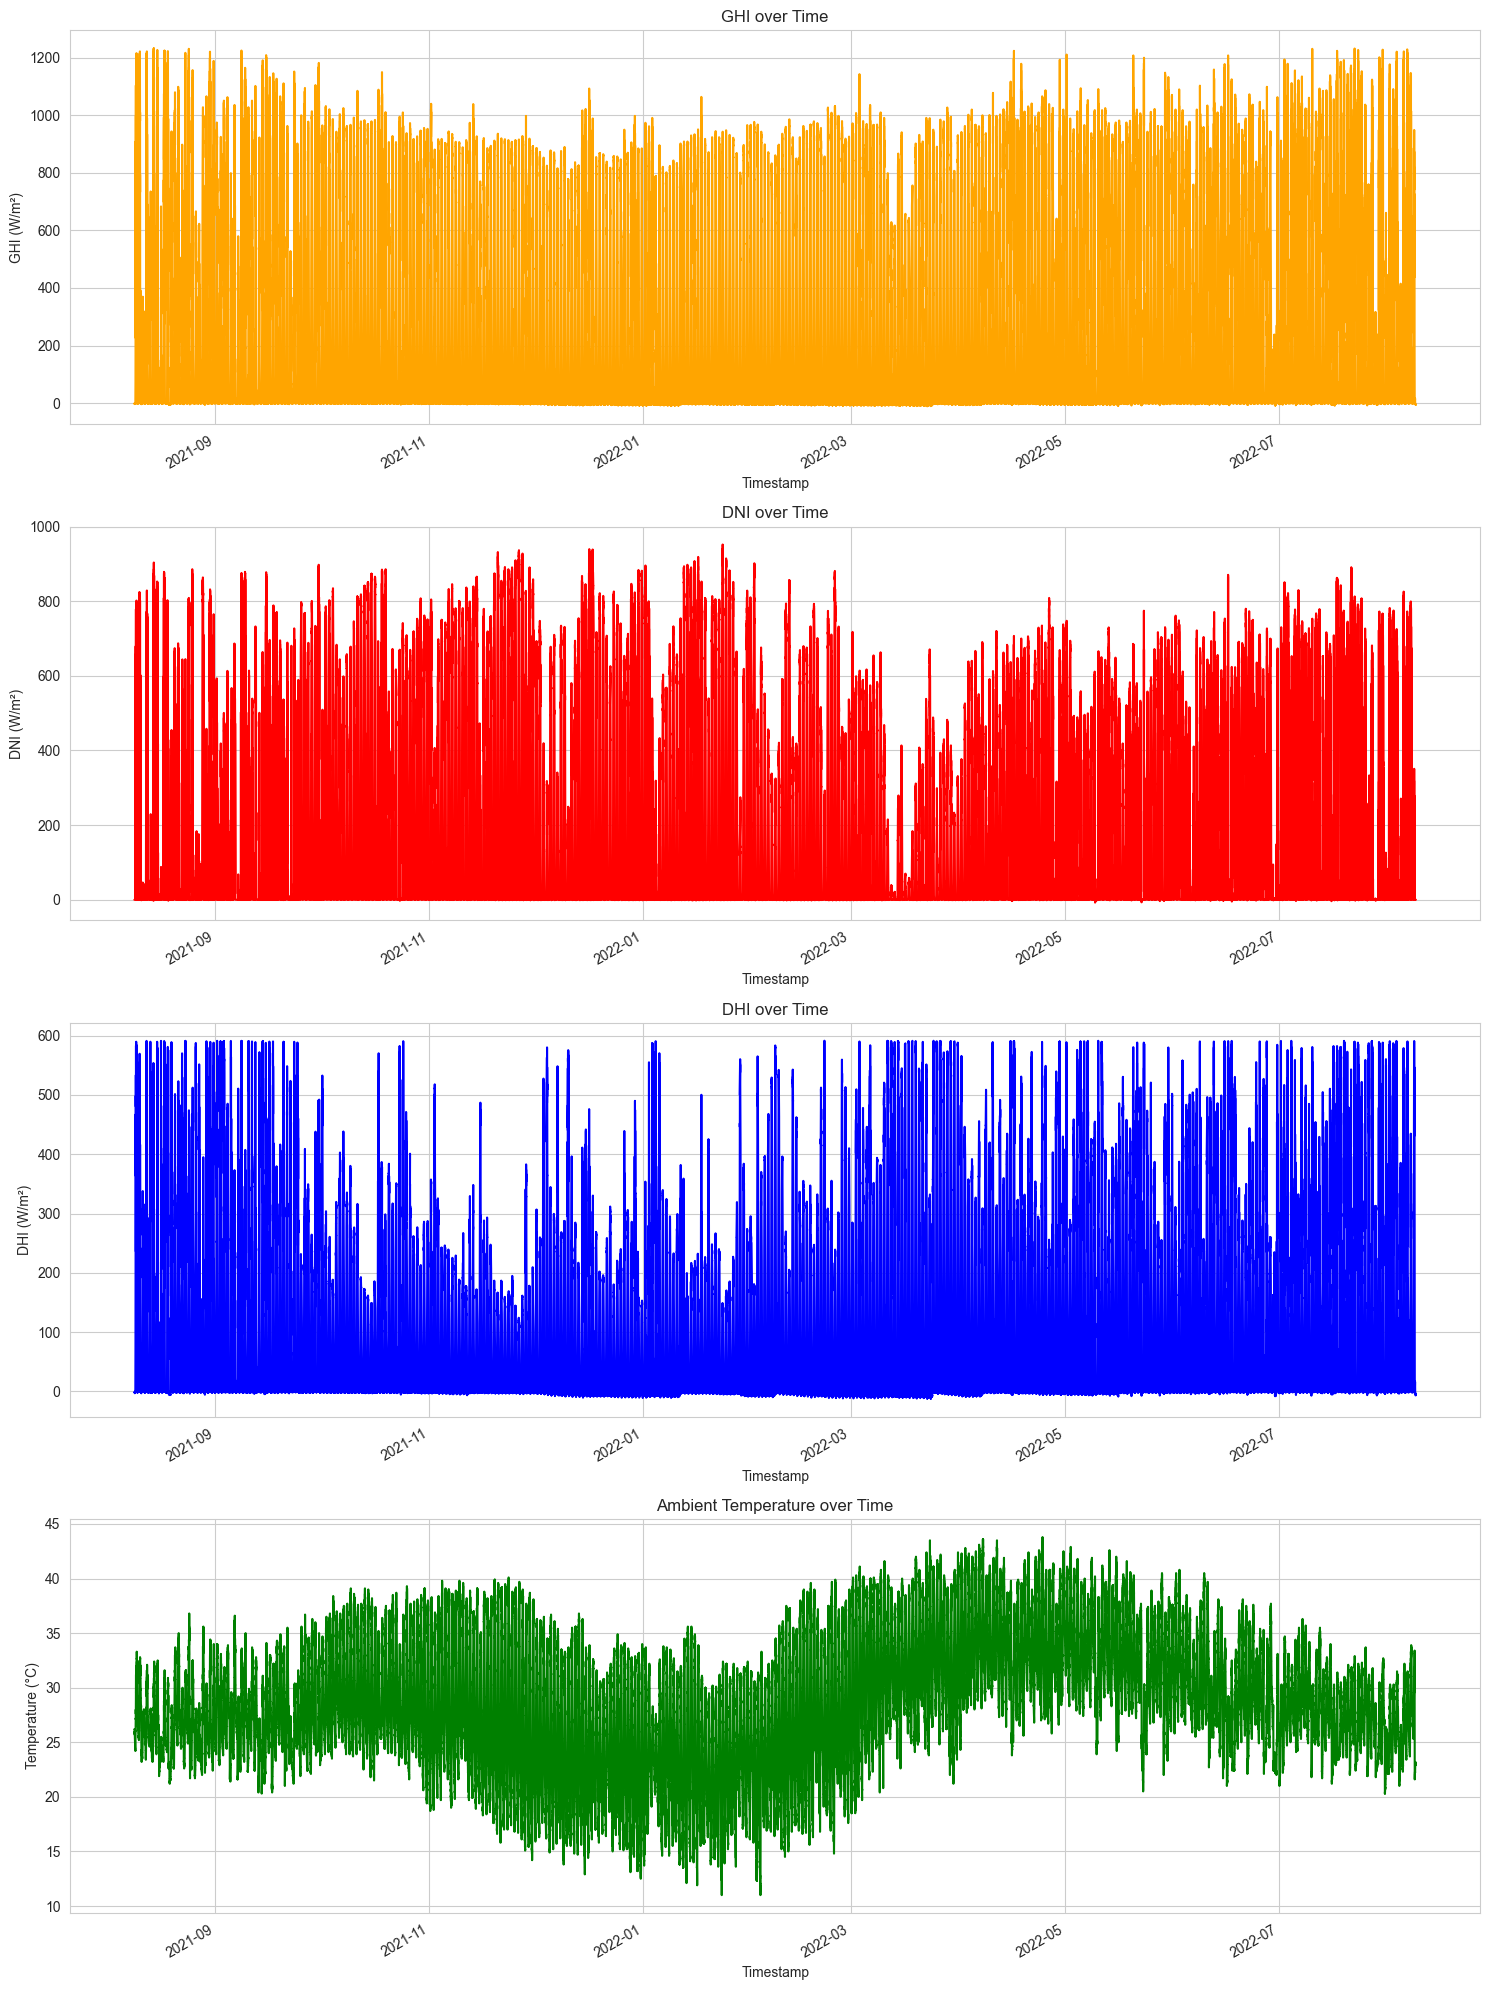

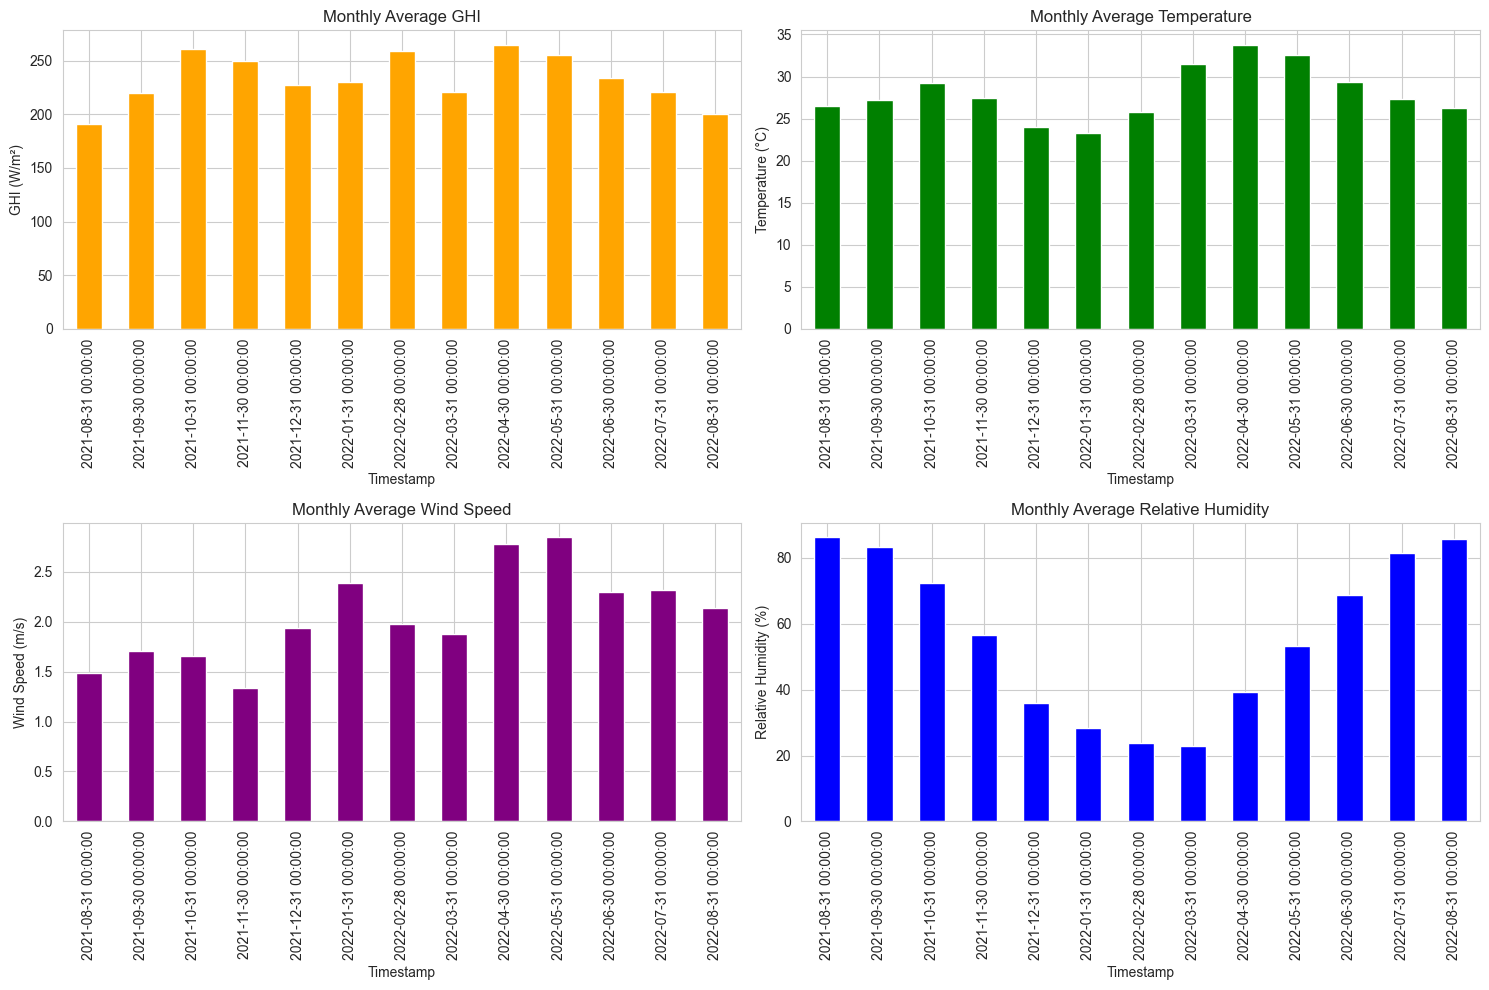

In [ ]:

df_clean['Timestamp'] = pd.to_datetime(df_clean['Timestamp'])
df_ts = df_clean.set_index('Timestamp')


fig, axes = plt.subplots(4, 1, figsize=(15, 20))

# GHI
df_ts['GHI'].plot(ax=axes[0], title='GHI over Time', color='orange')
axes[0].set_ylabel('GHI (W/m²)')

# DNI
df_ts['DNI'].plot(ax=axes[1], title='DNI over Time', color='red')
axes[1].set_ylabel('DNI (W/m²)')

# DHI
df_ts['DHI'].plot(ax=axes[2], title='DHI over Time', color='blue')
axes[2].set_ylabel('DHI (W/m²)')

# Ambient Temperature
df_ts['Tamb'].plot(ax=axes[3], title='Ambient Temperature over Time', color='green')
axes[3].set_ylabel('Temperature (°C)')

plt.tight_layout()
plt.show()

# Monthly aggregation
monthly_data = df_ts.resample('M').mean()

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

monthly_data['GHI'].plot(ax=axes[0, 0], kind='bar', color='orange', title='Monthly Average GHI')
axes[0, 0].set_ylabel('GHI (W/m²)')

monthly_data['Tamb'].plot(ax=axes[0, 1], kind='bar', color='green', title='Monthly Average Temperature')
axes[0, 1].set_ylabel('Temperature (°C)')

monthly_data['WS'].plot(ax=axes[1, 0], kind='bar', color='purple', title='Monthly Average Wind Speed')
axes[1, 0].set_ylabel('Wind Speed (m/s)')

monthly_data['RH'].plot(ax=axes[1, 1], kind='bar', color='blue', title='Monthly Average Relative Humidity')
axes[1, 1].set_ylabel('Relative Humidity (%)')

plt.tight_layout()
plt.show()

# Cleaning Impact Analysis


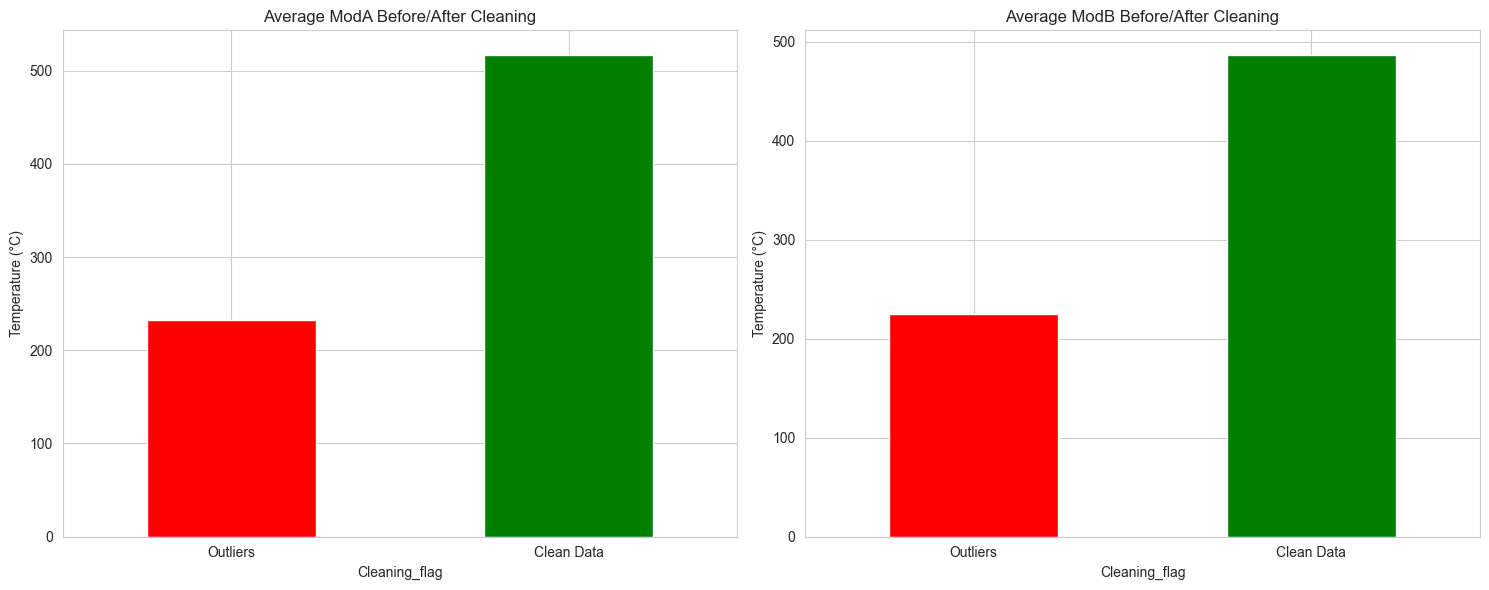

In [ ]:

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

df.groupby('Cleaning_flag')['ModA'].mean().plot(
    kind='bar', ax=axes[0], title='Average ModA Before/After Cleaning',
    color=['red', 'green']
)
axes[0].set_ylabel('Temperature (°C)')
axes[0].set_xticklabels(['Outliers', 'Clean Data'], rotation=0)


df.groupby('Cleaning_flag')['ModB'].mean().plot(
    kind='bar', ax=axes[1], title='Average ModB Before/After Cleaning',
    color=['red', 'green']
)
axes[1].set_ylabel('Temperature (°C)')
axes[1].set_xticklabels(['Outliers', 'Clean Data'], rotation=0)

plt.tight_layout()
plt.show()

# Correlation & Relationship Analysis

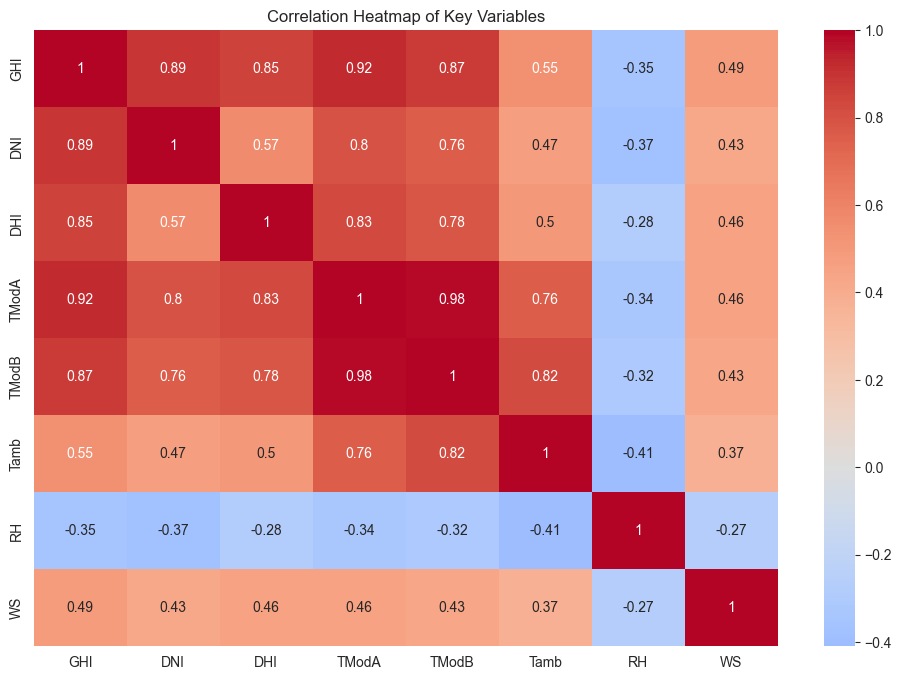

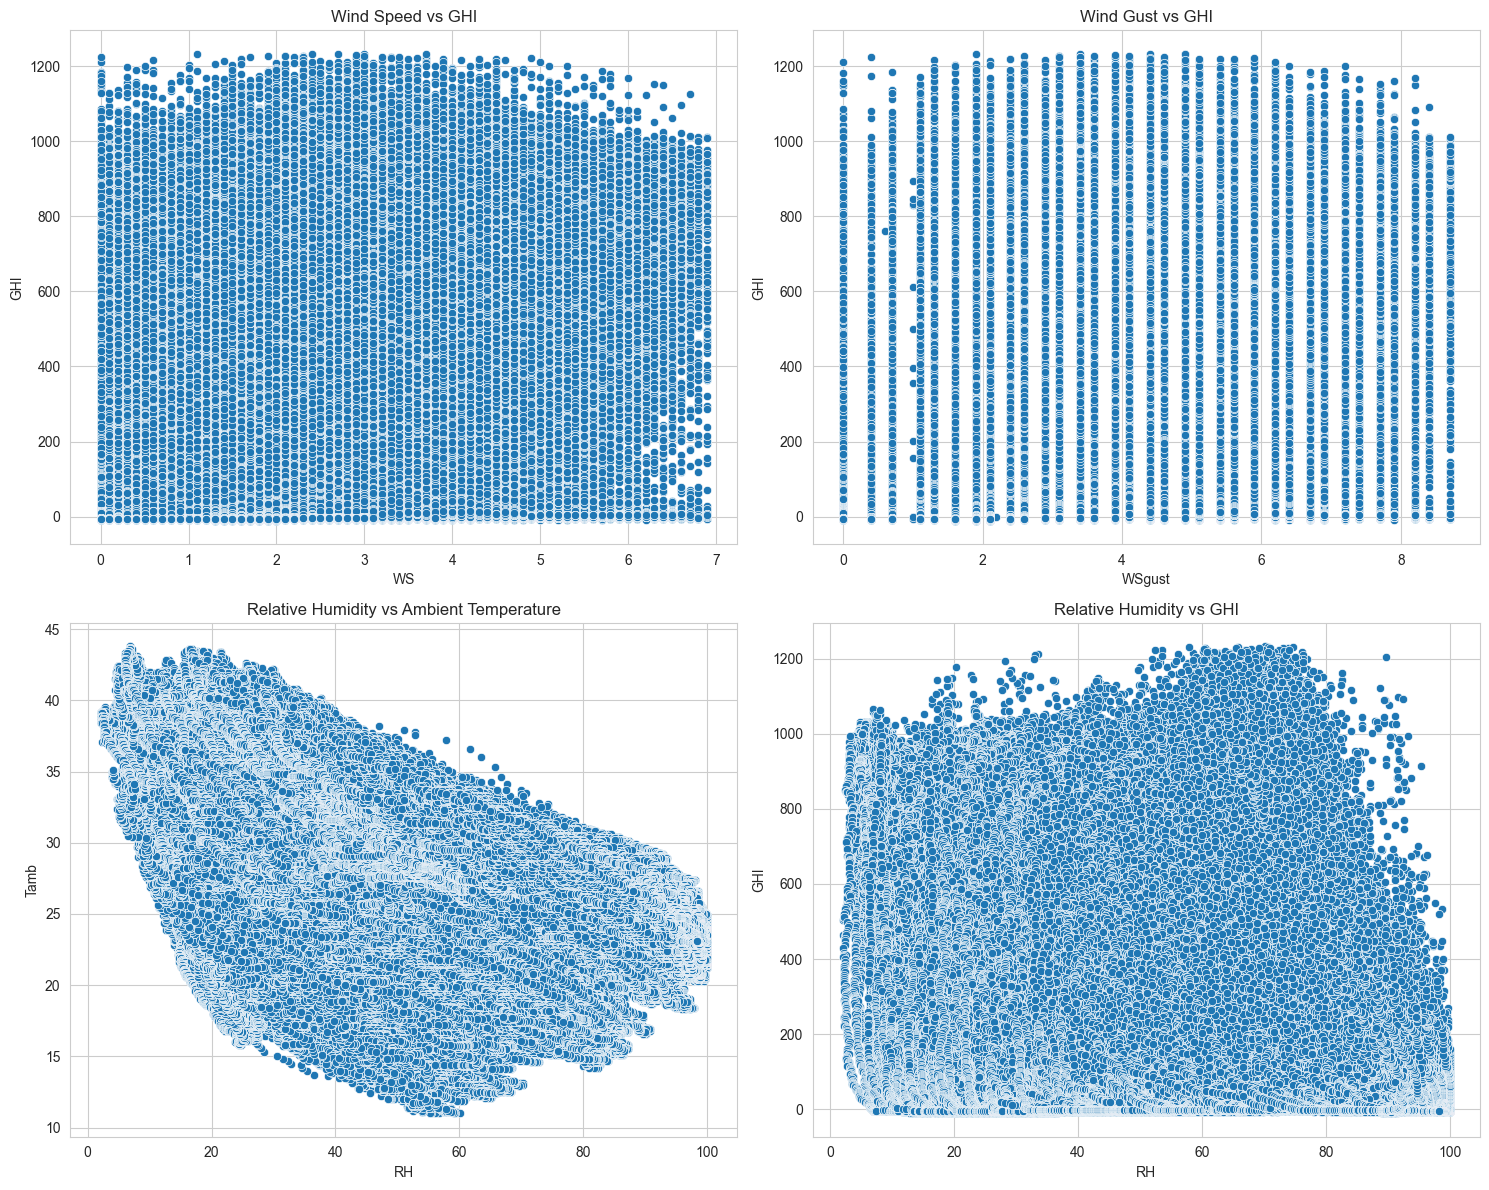

In [ ]:

corr_cols = ['GHI', 'DNI', 'DHI', 'TModA', 'TModB', 'Tamb', 'RH', 'WS']
corr_matrix = df_clean[corr_cols].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of Key Variables')
plt.show()

fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# WS vs GHI
sns.scatterplot(data=df_clean, x='WS', y='GHI', ax=axes[0, 0])
axes[0, 0].set_title('Wind Speed vs GHI')

# WSgust vs GHI
sns.scatterplot(data=df_clean, x='WSgust', y='GHI', ax=axes[0, 1])
axes[0, 1].set_title('Wind Gust vs GHI')

# RH vs Tamb
sns.scatterplot(data=df_clean, x='RH', y='Tamb', ax=axes[1, 0])
axes[1, 0].set_title('Relative Humidity vs Ambient Temperature')

# RH vs GHI
sns.scatterplot(data=df_clean, x='RH', y='GHI', ax=axes[1, 1])
axes[1, 1].set_title('Relative Humidity vs GHI')

plt.tight_layout()
plt.show()

# Wind & Distribution Analysis

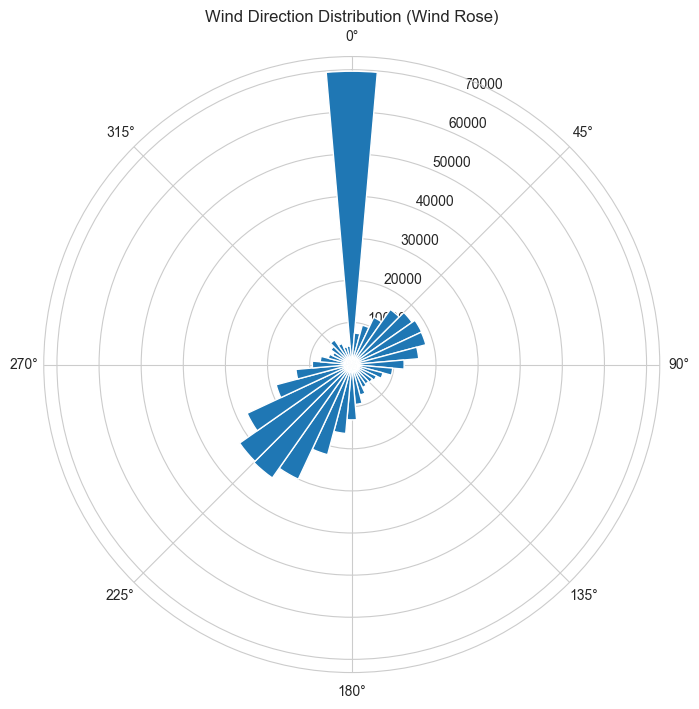

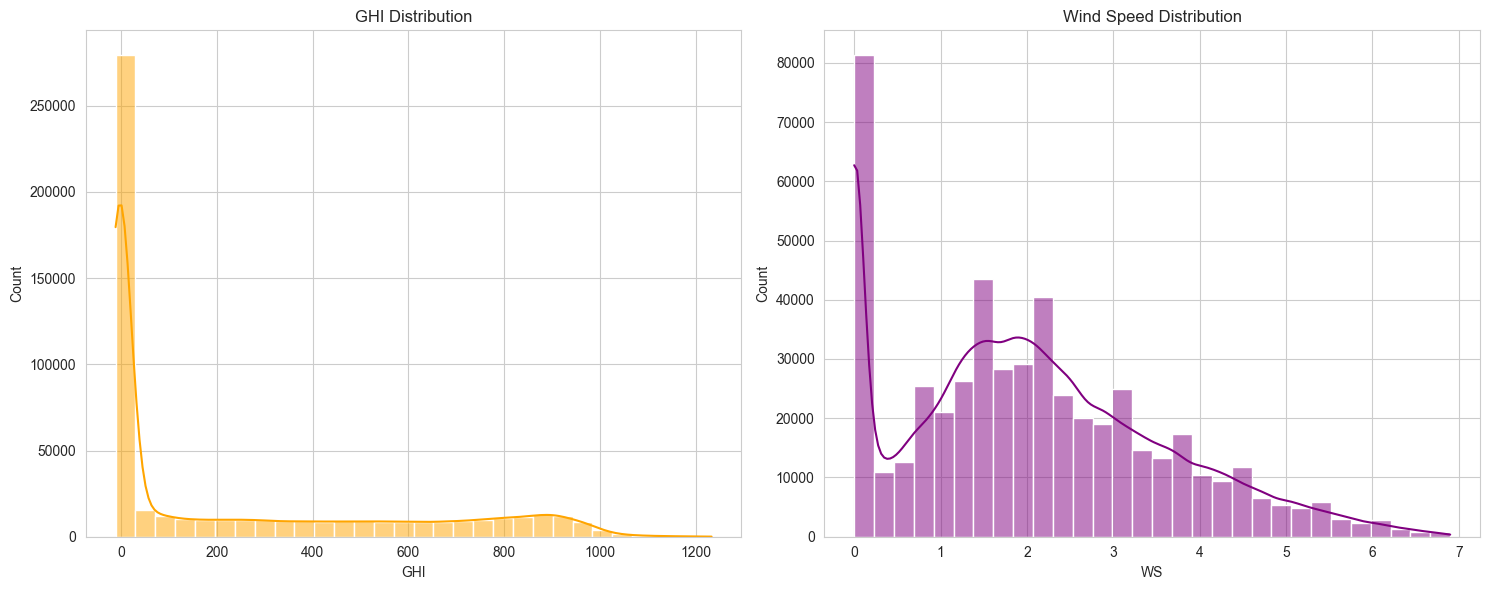

In [ ]:

if 'WD' in df_clean.columns:
    plt.figure(figsize=(10, 8))
    ax = plt.subplot(111, polar=True)
    
   
    theta = np.deg2rad(df_clean['WD'].dropna())
    
   
    ax = plt.subplot(111, polar=True)
    counts, bins = np.histogram(theta, bins=36)
    width = (2*np.pi) / 36
    bars = ax.bar(bins[:-1], counts, width=width, bottom=0.0)
    
    
    ax.set_theta_zero_location('N')
    ax.set_theta_direction(-1)
    ax.set_title('Wind Direction Distribution (Wind Rose)')
    plt.show()

# Histograms
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# GHI distribution
sns.histplot(data=df_clean, x='GHI', bins=30, kde=True, ax=axes[0], color='orange')
axes[0].set_title('GHI Distribution')

# Wind Speed distribution
sns.histplot(data=df_clean, x='WS', bins=30, kde=True, ax=axes[1], color='purple')
axes[1].set_title('Wind Speed Distribution')

plt.tight_layout()
plt.show()

# 8. Temperature Analysis

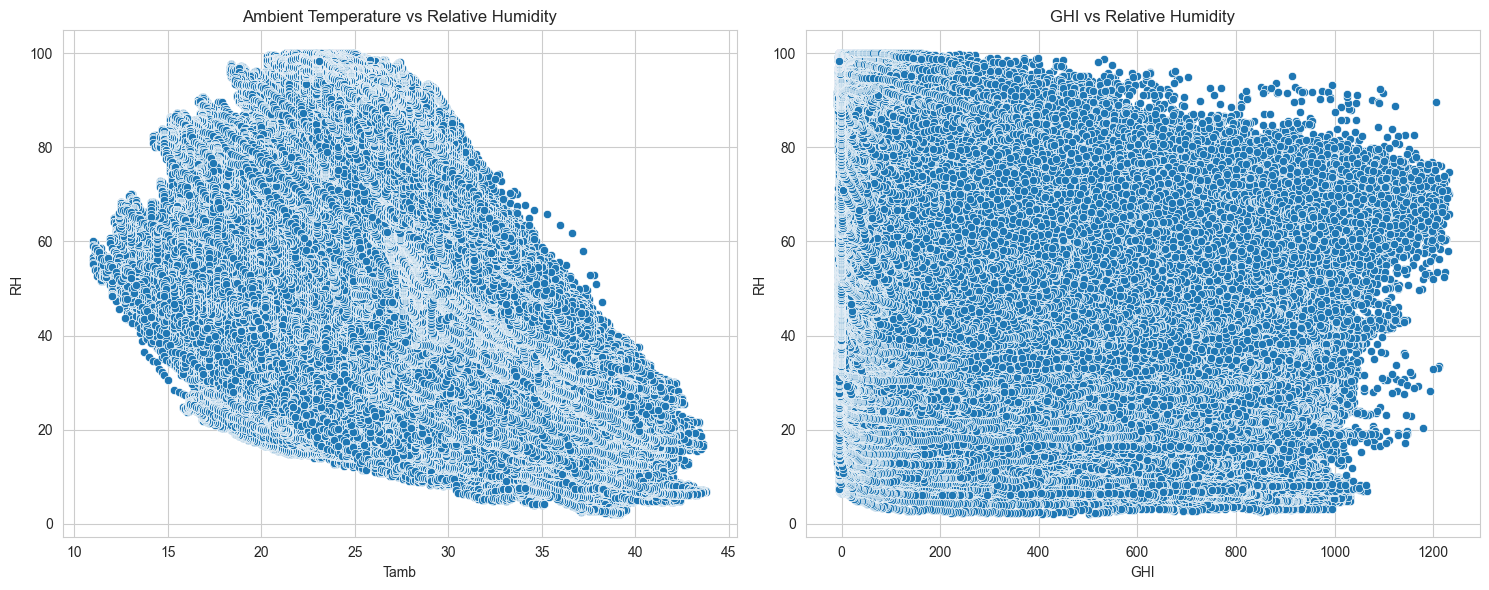

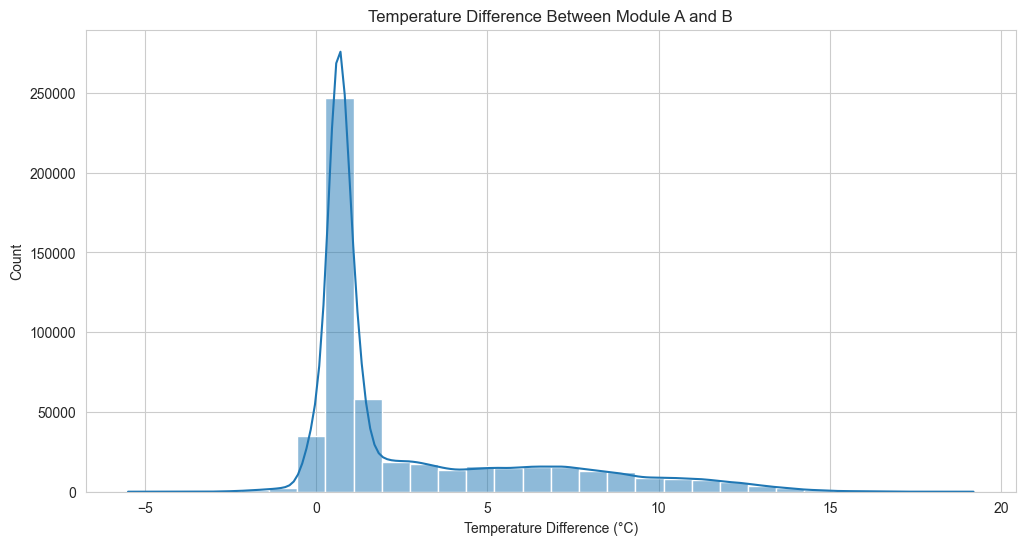

In [ ]:
# Temperature and RH analysis
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# RH vs Temperature
sns.scatterplot(data=df_clean, x='Tamb', y='RH', ax=axes[0])
axes[0].set_title('Ambient Temperature vs Relative Humidity')


sns.scatterplot(data=df_clean, x='GHI', y='RH', ax=axes[1])
axes[1].set_title('GHI vs Relative Humidity')

plt.tight_layout()
plt.show()


if 'TModA' in df_clean.columns and 'TModB' in df_clean.columns:
    df_clean['TMod_diff'] = df_clean['TModA'] - df_clean['TModB']
    
    plt.figure(figsize=(12, 6))
    sns.histplot(data=df_clean, x='TMod_diff', bins=30, kde=True)
    plt.title('Temperature Difference Between Module A and B')
    plt.xlabel('Temperature Difference (°C)')
    plt.show()

# Bubble Chart

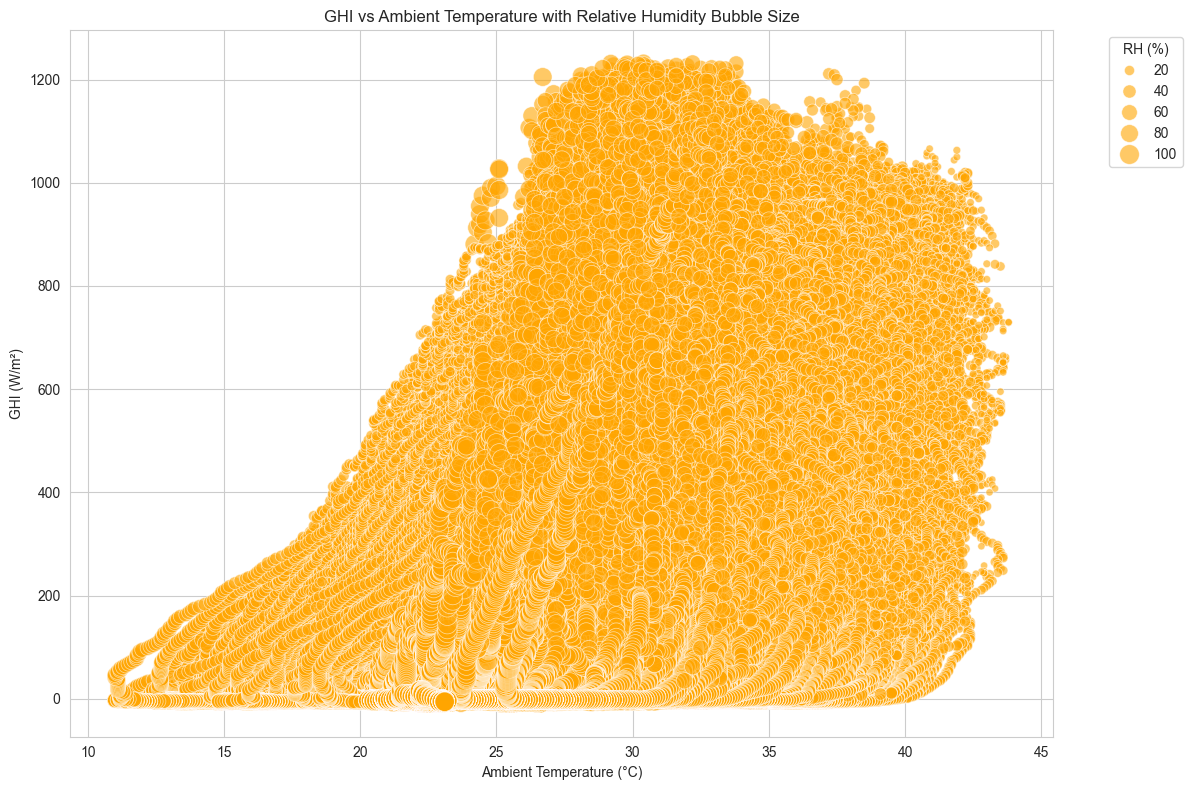

In [ ]:

plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=df_clean,
    x='Tamb',
    y='GHI',
    size='RH',
    sizes=(20, 200),
    alpha=0.6,
    color='orange'
)
plt.title('GHI vs Ambient Temperature with Relative Humidity Bubble Size')
plt.xlabel('Ambient Temperature (°C)')
plt.ylabel('GHI (W/m²)')
plt.legend(title='RH (%)', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Final Summary

In [ ]:

summary = {
    "Initial Rows": len(df),
    "Cleaned Rows": len(df_clean),
    "Percentage Data Kept": f"{(len(df_clean)/len(df))*100:.2f}%",
    "Key Correlations": {
        "GHI-Tamb": corr_matrix.loc['GHI', 'Tamb'],
        "GHI-RH": corr_matrix.loc['GHI', 'RH'],
        "Tamb-RH": corr_matrix.loc['Tamb', 'RH']
    },
    "Average GHI": f"{df_clean['GHI'].mean():.2f} W/m²",
    "Average Temperature": f"{df_clean['Tamb'].mean():.2f} °C",
    "Average Wind Speed": f"{df_clean['WS'].mean():.2f} m/s"
}

print("Key Findings Summary:")
for key, value in summary.items():
    print(f"{key}: {value}")

Key Findings Summary:
Initial Rows: 525600
Cleaned Rows: 517860
Percentage Data Kept: 98.53%
Key Correlations: {'GHI-Tamb': np.float64(0.5450347744575925), 'GHI-RH': np.float64(-0.3536366200423761), 'Tamb-RH': np.float64(-0.40950706436836365)}
Average GHI: 236.23 W/m²
Average Temperature: 28.15 °C
Average Wind Speed: 2.07 m/s
